### Bagging, random forests and boosting

트리 모형만으로는 예측력이 떨어지기 때문에 일련의 트리들을 통해서 더 나은 방법을 모색할 수 있다.

여러 개의 예측기로부터 예측을 종합하여 더 좋은 예측을 얻는 방법을 앙상블 학습 (ensemble learning)이라고 한다.

앙상블 학습은 트리 뿐만이 아닌 다른 학습에도 이용될 수 있다.

### Bagging

배깅 (bagging)은 bootstrap aggregation이라고도 불리우며 통계 학습에서 variance를 줄이기 위해 사용하는 일반적인 방법이다.

여러 확률변수들을 평균내는 과정을 거치면 분산은 줄어들게 되며 배깅도 이 원리에 기반한다.

$B$개의 서로 다른 bootstrap 훈련 데이터 셋을 만들었다고 하자.

Regression 문제에 대해 $b$-번째 bootstrap된 훈련 데이터를 이용하여 $\hat f^{*b}$의 적합 모형을 얻었다고 하자.

그러면 $x$에서의 예측은 다음과 같이 얻을 수 있다.

$$ \hat f_{\mathrm{bag}}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat f^{*b}(x) $$

이를 bagging이라 한다.

Classification 문제의 경우 다수결 (majority vote) 개념을 이용한다.

즉, 여러 개의 분류기 $\hat f^{*b}(x)$의 예측값들 중 가장 많은 표를 획득한 클래스가 예측값이 된다.

Bagging의 test 에러는 비교적 간단하게 추정할 수 있다.

Bootstrap 과정에서 일부의 데이터 (대략 2/3)는 자연스럽게 훈련 데이터가 되고 나머지는 훈련에 사용하지 않게 된다.

따라서 훈련에 사용되지 않은 out-of-bag (OOB) 데이터를 이용해 테스트 성능을 시험해 볼 수 있다.

관찰값 입장에서 보면 $i$번째 관찰값은 대략 B/3회 정도 테스트에 참여하게 되며, 이를 평균내거나 다수결 투표를 이용하여 예측값을 정한다.

실제 $y$값과 비교하여 테스트 에러를 추정할 수 있다.

### Random forest

랜덤 포레스트 (random forest)는 bagged tree를 트리 간의 decorrelation을 통해 향상시킨 개념이다.

Bagging에서 bootstrap을 통해 만들어진 훈련 데이터 셋들은 서로 공유하는 데이터가 많아 이를 통해 만들어진 tree들은 높은 상관관계를 지니고 이에 따라 높은 variance를 유발한다.

랜덤 포레스트에서는 트리를 생성할 때, $p$개의 predictor중 임의로 선택된 $m$개의 predictor들을 후보로 하여 트리 분할을 진행한다.

일반적으로 $m \approx \sqrt{p}$로 한다.

랜덤 포레스트 방법은 트리 분할이 일어날 때 의도적으로 일부 predictor를 제외한다.

제외된 predictor들에는 strong predictor들도 있을 수 있는데 이들이 제외됨으로써 트리간의 decorrelation이 발생한다.

이러한 제외 과정이 없는 bagging에서는 사실 트리들이 모두 비슷비슷하게 생겼을 가능성이 높다.

아래 그림은 bagging과 random forest 방법에서의 에러를 나타낸다.

<img src="image/bagging_rf.png" width="500">

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), max_samples=100, n_estimators=300, bootstrap=True, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [3]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.928


In [4]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.896


In [5]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

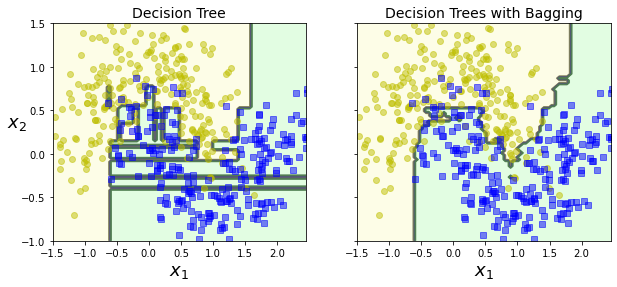

In [6]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

In [7]:
bag_clf.oob_score_

0.9066666666666666

In [8]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

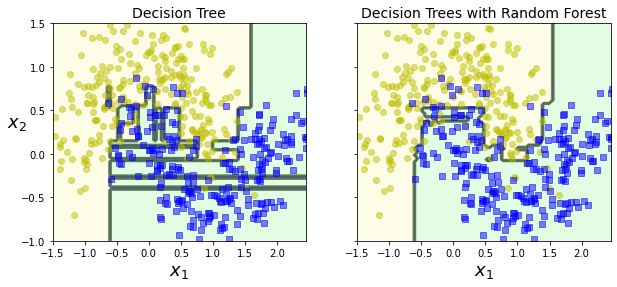

In [9]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(rnd_clf, X, y)
plt.title("Decision Trees with Random Forest", fontsize=14)
plt.ylabel("")
plt.show()

In [10]:
print(accuracy_score(y_test, y_pred_rf))

0.904


### Boosting

부스팅 (boosting)은 bagging과 마찬가지로 다른 일반적인 통계적 학습에 적용할 수 있다.


### Adaboost

에이다부스트 (adaboost)는 adaptive boosting의 줄임말로 인기있는 부스팅 방법 중 하나이다.

트리뿐만 아니라 다른 예측기들을 통해서도 adaboost를 적용할 수 있다.

여러 약한 학습기, 예를 들어 분기가 하나인 트리, 를 순차적으로 학습하여 합함으로 강한 학습기를 만든다.

분류기의 경우 다음과 같은 방식으로 adaboost는 작동한다.

* 첫 번째 분류기를 훈련세트에서 훈련시키고 예측한다. 

* 잘못 분류된 샘플의 가중치를 높인다.

* 두 번째 분류기는 업데이트된 가중치를 사용하여 훈련하고 다시 예측한다.

* 또다시 잘못 분류된 샘플의 가중치를 업데이트한다.

보다 자세히 살펴보면, $i$-번째 샘플의 가중치 $w^{(i)}$는 초기에는 $\frac{1}{m}$으로 초기화한다.

첫 번째 예측기가 학습되고, 가중치가 적용된 에러율 $r_1$가 계산된다.

$$ r_j = \frac{\sum^{m}_{i=1, \hat y_j^{(i)} \neq y^{(i)}} w^{(i)}}{ \sum_{i=1}^{m}w^{(i)}} $$

각 예측기의 가중치 $\alpha_j$는 다음과 같다.

$$ \alpha_j = \eta \log \frac{1 - r_j}{r_j} $$

여기서 $\eta$는 학습률 하이퍼파라미터로 기본값은 1이다.

예측기가 정확할수록 예측기의 가중치 $\alpha_j$가 커진다.

그 다음 샘플의 가중치를 다음을 이용하여 업데이트한다.

$$
w^{(i)}  \leftarrow 
\left\{\begin{array}{ll}
w^{(i)}, & \text{if }  y_j^{(i)} = y^{(i)}\\
w^{(i)} \exp(\alpha_j) , & \text{if }  y_j^{(i)} \neq y^{(i)} 
\end{array}\right.
$$

그 후 샘플의 가중치는 $ \sum_{i=1}^{m} w^{(i)}$로 나누어 정규화한다.

이 과정을 반복한다.

예측을 할 때는 가중치 $\alpha_j$들의 합을 최대화 하는 클래스가 예측 결과가 된다.

$$ \hat y (x) = \arg\max_{k} \sum_{j=1, \hat y_j (x) = k}^{N} \alpha_j $$

즉, 다수결 투표와 비슷하지만 분류기의 성능에 따라 투표 가중치 $\alpha_j$를 달리준다. ($\alpha_j =1$이면 일인 일투표권과 같음)

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

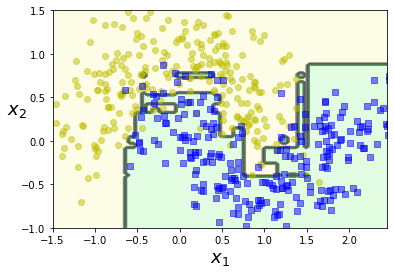

In [12]:
plot_decision_boundary(ada_clf, X, y)

### Gradient boosting

또하나의 인기있는 부스팅은 gradient boosting이다.

이 경우 부스팅은 데이터가 아닌 residual을 이용하여 학습하는 개념이다.

* residual은 모형의 예측과 관측값의 차이라는 점에서, 모형의 예측이 잘 들어맞지 않는 부분을 중점적으로 다시 학습하는 방식이다.

Regression 모형에서 gradient boosting은 다음의 알고리즘을 따른다.

* $\hat f(x) = 0, r_i = y_i$로 한다.

* $b = 1, 2, \cdots, B$에 대해 다음을 반복한다.

  * 트리 $\hat f^{b}$를 훈련데이터 $(X, r)$에 적합한다.
  
  * $\hat f$를 업데이트 한다. 이때 shrinkage parameter $\lambda$를 이용한다.
  
     * $\hat f(x) \leftarrow \hat f(x) + \lambda \hat f^{b}(x) $
     
     * Residual을 업데이트 한다. $r_i \leftarrow r_i - \lambda \hat f^{b}(x)$
     
* 최종 모형은 다음과 같다: $\hat f (x) = \sum_{b=1}^{B} \lambda \hat f^{b}(x) $
  
분류 모형에서도 비슷하게 적용할 수 있다.

In [13]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [15]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [16]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [17]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred


array([0.75026781])

In [18]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

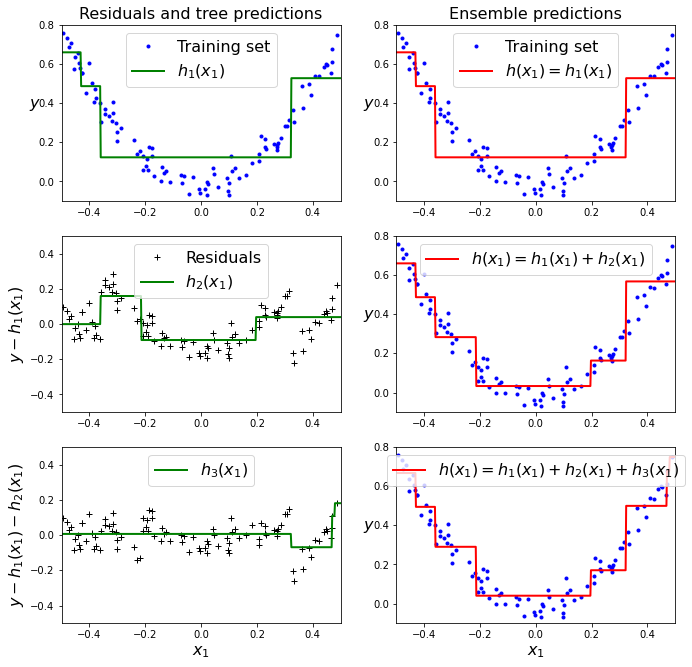

In [19]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

In [21]:
min_error = np.min(errors)

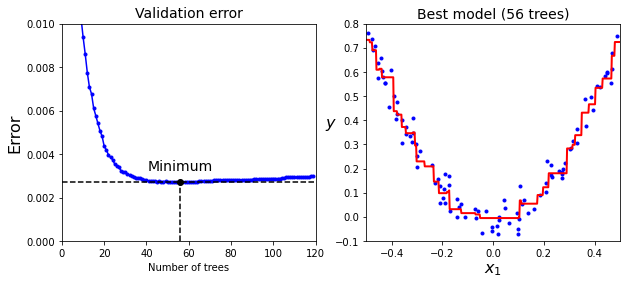

In [22]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

GradientBoostRegressor는 각 트리가 훈련할 때 사용할 훈련 샘플의 비율을 지정할 수 있다. 

```subsample``` 매개변수로 조정한다.

예를들어 ```subsample = 0.25```라면 각 트리는 무작위로 선택한 25%의 훈련샘플을 이용한다.

최적화된 그레디언트 부스팅 구현으로 XGBoost라는 것이 유명하다.

In [23]:
import xgboost

xgb_reg = xgboost.XGBRegressor()

In [25]:
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

array([ 1.7530948e-01,  1.6314921e-01, -4.9100686e-02,  2.1370557e-01,
        5.1830430e-02, -4.7953380e-03, -3.8747080e-02,  6.1436914e-02,
        5.7649994e-01,  5.9873533e-01,  3.7318233e-01,  2.8410304e-01,
        3.7318233e-01,  6.5670704e-04,  5.8043188e-01,  6.1399251e-02,
        1.0723283e-01,  7.1178623e-02,  5.5848247e-01,  3.3459730e-02,
        1.6314921e-01,  6.0617554e-01,  2.5032136e-01,  4.1003972e-01,
        6.7880332e-01], dtype=float32)

In [29]:
#자동 조기 종료 기능
xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)  
print("Validation MSE:", val_error)            

[0]	validation_0-rmse:0.22834
[1]	validation_0-rmse:0.16224
[2]	validation_0-rmse:0.11843
[3]	validation_0-rmse:0.08760
[4]	validation_0-rmse:0.06848
[5]	validation_0-rmse:0.05709
[6]	validation_0-rmse:0.05297
[7]	validation_0-rmse:0.05129
[8]	validation_0-rmse:0.05155
[9]	validation_0-rmse:0.05211
Validation MSE: 0.002630868681577655
